# 03. PyTorch Computer Vision

**Reference**
[pytorch-deep-learning](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/docs) repo by Daniel Bourke

**What is a computer vision problem?**: Anything that you can see
 - Binary classification problem (distinguishing images from two classes)
 - Multi-class classification problem (distinguishing images form among multiple classes)
 - Object detection (find a target object within an image)
 - Image segmentation (split an image into multiple context segments that make up an image)
 - Environmental modelling/perception (e.g. for self-driven automobiles)

**Items covered in this section**

![](./screenshots/1_topics_covered_computer_vision_module.png)

**Inputs and outputs of a computer vision algorithm**

![](./screenshots/2_Compter_vision_inputs_and_outputs.png)

**Input and output shapes** (for a classification example)

 - **Input:** `[batch_size, height, width, color_channels]`
 - **Output:** `[number_of_classes]`

This can be done according to various conventions:

 - **NHWC:** `[batch_size, height, width, color_channels]`
 - **NCHW** `[batch_size, color_channels, height, width]`

One needs to keep in mind that data from different sources can be shaped differently, which needs to be taken into account in the data preparation code.

![](./screenshots/3_Input_and_output_shapes.png)

**PyTorch workflow**

![](./screenshots/4_PyTorch_workflow.png)

## Convolution Neural Networks (CNN)

**Architecture of a CNN**
![](./screenshots/5_CNN_Architecture.png)


## .0 Computer vision libraries in PyTorch

 - `torchvision` - base domain library for computer vision ([doc](https://pytorch.org/vision/stable/index.html))
 - `torchvision.datasets` - datasets and data-loading functions for computer vision
 - `torchvision.models` - Pre-trained computer vision models that one can tune for other problems
 - `torchvision.transforms` - Functions for manipulating images and data to make it suitable machine learning usage
 - `torch.utils.data.Dataset` - Base dataset class from Pytroch
 - `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [2]:
# import the main libraries

# import PyTorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import  ToTensor

# import matplolib
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.1.0+cpu
0.16.0+cpu


## 1. Getting a dataset

The dataset used in this module is taken from [`Fashion-MNIST`](https://github.com/zalandoresearch/fashion-mnist)

One option to download this dataset would be to get it directly from GitHub.
However, one can get it directly through `PyTorch`, in particular from [`torchvision.datasets`](https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html).

Another popular dataset is [imagenet](https://www.image-net.org/), but it will not be part of this module.

In [3]:
# Setup training data
get_fashionMNIST = lambda train: datasets.FashionMNIST( # FashionMNIST dataset getter function
    root="data",                                        # where to download the data to
    train=train,                                        # get the pre-defined dataset
    download=True,                                      # download the data
    transform=ToTensor(),                               # transformation performed on data
    target_transform=None                               # transformation done on the target (labels)
)

train_data = get_fashionMNIST(True)
test_data = get_fashionMNIST(False)

100%|██████████| 26421880/26421880 [00:04<00:00, 6000881.38it/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 778966.30it/s]

Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5403654.88it/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 2585901.44it/s]


Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [4]:
len(train_data), len(test_data)

(60000, 10000)

torch.Size([1, 28, 28]) 9
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Text(0.5, 1.0, 'An Ankle boot!')

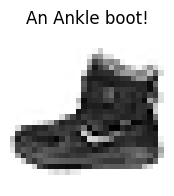

In [39]:
# visualizing the downloaded data
image, label = train_data[0]                            # extract a the first entry in the dataset
print(image.shape, label)                               # print out their shape

class_names = train_data.classes                        # extract classes ground truth
print(class_names)

# visualize the first image
plt.figure(figsize=(2,2))
plt.imshow(image.permute([1,2,0]), cmap="Greys")
plt.axis(False)
plt.title(f"An {class_names[label]}!")

In [33]:
# some other nice-to-know-abouts
class_to_idx = train_data.class_to_idx                  # dict to get the index of a given class
print(class_to_idx)

train_data.data.shape, train_data.targets.shape

{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


(torch.Size([60000, 28, 28]), torch.Size([60000]))

### 1.2 Visualizing the downloaded data

Image shape: torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

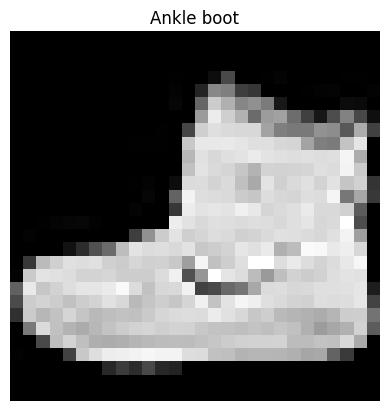

In [38]:
print(f"Image shape: {image.shape}")

# represent as image (this time as performed by Daniel in the video)
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

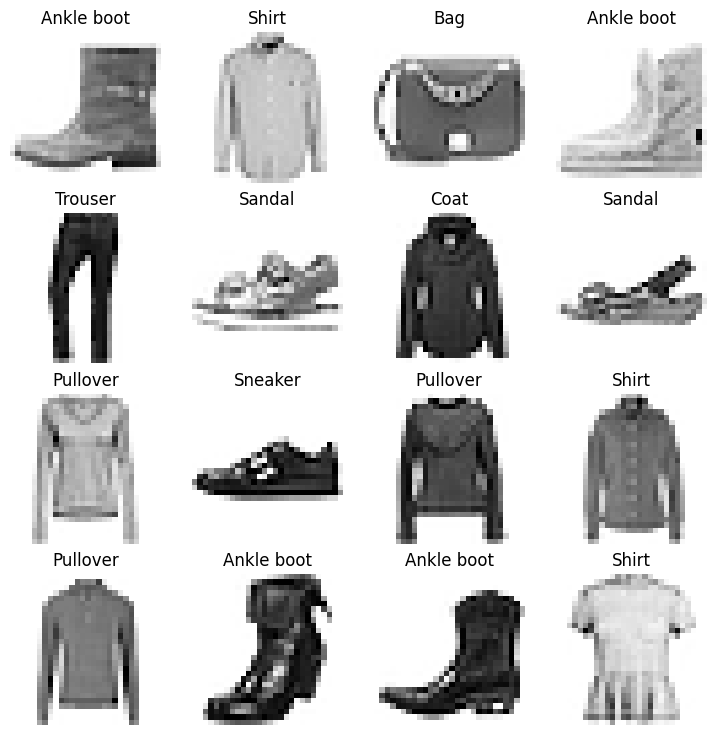

In [43]:
# plot more images
torch.manual_seed(42)

fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, rows*cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[random_idx]

    plt.subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap="Greys")
    plt.axis(False)
    plt.title(class_names[label])

# note: Chances are that some of the images in the dataset are quite similar,
#       which will make it difficult for the algo to distinguish them

**Note:**
Images from clothing items are examples of a type of data which cannot be modeled by straight lines alone

## 2. Prepare Dataloader

Once downloaded, the data is in the form of a `PyTorch` Dataset.
`DataLoader`turns the dataset into a Python iterable, more specifically, into batches.

Why? Because one will not always look at the total amount of available data, especially during a prototyping phase.

Therefore, `DataLoader` allows one to break down the total dataset into smaller, more manageable data batches.
A common batch size to start with is 32.

This way, the nn will have more changes of updating the gradients per epoch (this will become clearer later on)

![](./screenshots/6_dataset_batching.png)